# Predict diabetes through data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

위의 문장은 경고를 무시하기 위한 문장으로 없어도 무방하다.

### data preprocessing

In [3]:
dataset = pd.read_csv('./data/diabetes.csv')

In [4]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


  .info() : 해당 데이터프레임의 상세한 정보를 볼 수 있다.  
  데이터의 총 개수(0~n행까지), 데이터의 칼럼명, 데이터의 개수, 데이터의 타입을 확인할 수 있다.  
  반드시 데이터의 타입을 확인해야 한다. 

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


.describe() : 데이터프레임의 상세한 정보(개수, 평균, 표준편차 등)를 볼 수 있다. 

In [7]:
# Check missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

위의 결과를 보았을 때, 결측치가 0인 것을 알 수 있다. 

In [8]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,[-1]]

X는 0~7행까지로 임신횟수부터 나이까지의 행으로 독립변수이다.  
y는 8행으로 당뇨병의 결과(0,1)를 의미한다. 종속변수이다. 

In [9]:
# Check datas
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Outcome
0        1
1        0
2        1
3        0
4        1


위의 결과를 보았을 때 X에는 Pregnancies~Age 까지의 데이터프레임이고, y는 당뇨병결과(outcome)만 들어있는 데이터프레임인 것을 알 수 있다. 

In [10]:
print("dimension of diabetes data: {}".format(dataset.shape))

dimension of diabetes data: (768, 9)


shape를 통해 데이터셋의 모양을 확인한다.

In [11]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


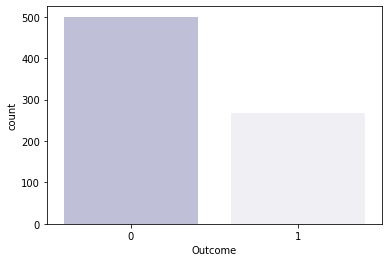

In [12]:
import seaborn as sns
sns.countplot(dataset['Outcome'],label="Count", palette=["#bcbbdc", "#efeef5"])

결과의 개수를 나타낸 표이다.   
당뇨병 아닌 사람 : 500명   
    당뇨병인 사람 : 268명

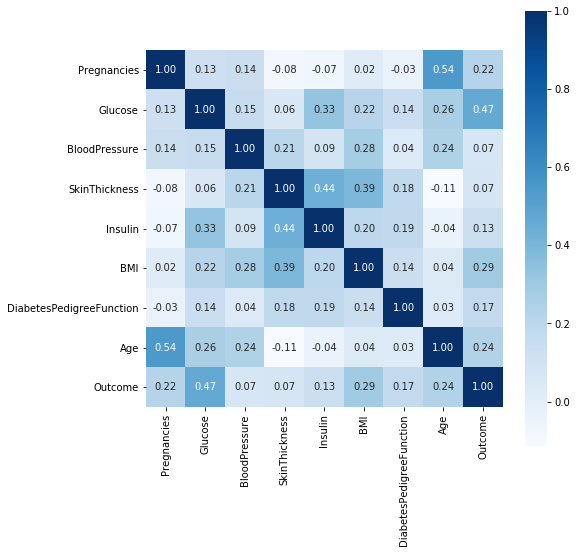

In [13]:
correlation = dataset.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, fmt = '.2f',cmap='Blues', square=True)

상관관계분석을 위하여 heatmap을 작성했다.  
0.54 : 나이와 임신횟수  
0.47 : 당뇨병 여부와 글루코오스  
0.44 : 인슐린과 피부두께  
0.39 : BMI와 피부두께  
0.29 : BMI와 당뇨병여부

### k-Nearest Neighbors

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2)

테스트 데이터셋의 비율은 20퍼센트이다. 나머지는 훈련 데이터셋으로 사용한다.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11, 2)

In [16]:
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

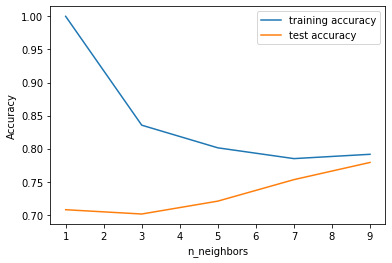

In [17]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [18]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


### Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(C=1, penalty="l2").fit(X_train, y_train)
logreg2 = LogisticRegression(C=100, penalty="l2").fit(X_train, y_train)
logreg3 = LogisticRegression(C=0.001, penalty="l2").fit(X_train, y_train)

In [20]:
print("C = 1, L2 Training set accuracy: {:.3f}".format(logreg1.score(X_train, y_train)))
print("C = 1, L2 Test set accuracy: {:.3f}".format(logreg1.score(X_test, y_test)))

C = 1, L2 Training set accuracy: 0.772
C = 1, L2 Test set accuracy: 0.792


In [21]:
print("C = 100, L2 Training set accuracy: {:.3f}".format(logreg2.score(X_train, y_train)))
print("C = 100, L2 Test set accuracy: {:.3f}".format(logreg2.score(X_test, y_test)))

C = 100, L2 Training set accuracy: 0.777
C = 100, L2 Test set accuracy: 0.786


In [22]:
print("C = 0.001, L2 Training set accuracy: {:.3f}".format(logreg3.score(X_train, y_train)))
print("C = 0.001, L2 Test set accuracy: {:.3f}".format(logreg3.score(X_test, y_test)))

C = 0.001, L2 Training set accuracy: 0.687
C = 0.001, L2 Test set accuracy: 0.714


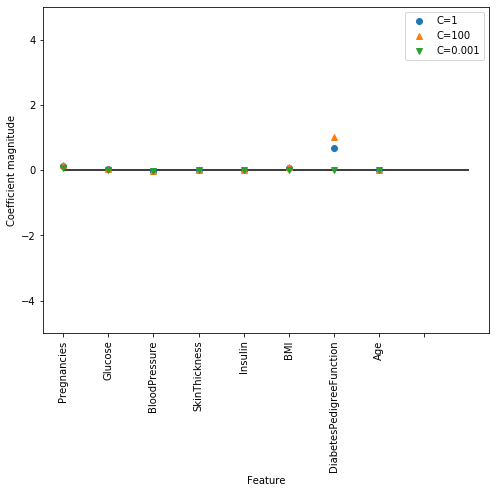

In [23]:
diabetes_features = [x for i,x in enumerate(dataset.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg2.coef_.T, '^', label="C=100")
plt.plot(logreg3.coef_.T, 'v', label="C=0.001")
plt.xticks(range(dataset.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, dataset.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

위의 그래프를 보면 C=1, C=100일 때, 회귀 계수가 양수가 된다는 것을 볼 수 있다.  
이러한 결과로 인해 당뇨병의 DiabetesPedigreeFunction 속성이 당뇨병과 연관이 깊다는 것을 알 수 있다. 

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.662


In [25]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.770
Accuracy on test set: 0.747


In [26]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.63995127 0.         0.         0.         0.22297015
 0.         0.13707858]


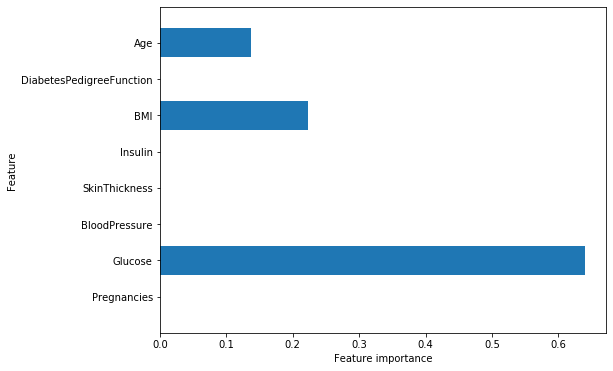

In [27]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.779


In [29]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.787
Accuracy on test set: 0.805


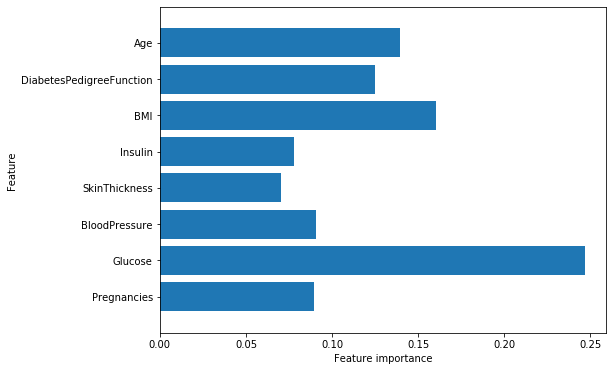

In [30]:
plot_feature_importances_diabetes(rf)

### SVM(SVC) 

In [31]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svm = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.708
